<a href="https://colab.research.google.com/github/clozada323/Monitoria_Econometria1_2022-2/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación 
# Fecha: Mayo 12 de 2022
## **Contenido:**

1. Dependencias
2. Datos
3. Regresión logística
3. Árbol de clasificación
4. Máquinas de soporte vectorial
5. Bosques
6. K-vecinos más cercanos
7. Naive Bayes

## 1. Dependencias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## 2. Datos

In [ ]:
datavino = load_wine()
print(datavino.data)
print(datavino.feature_names)
print(datavino.data.shape)
print(datavino.target.shape)
print(datavino.target)
print(datavino.DESCR)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
.. 

In [ ]:
## Definir x , y
x = datavino.data
y = datavino.target

In [ ]:
# División de los datos 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
## Escalar los datos
datosescalados = StandardScaler()
x_train = datosescalados.fit_transform(x_train)
x_test = datosescalados.fit_transform(x_test)

In [ ]:
print(x_test)
print(x_train)

[[-1.6744596  -0.31550716  0.42841285  0.79461476 -0.91541012 -0.20057636
  -0.01675181  0.88913661 -0.27307489 -0.88334427  0.29802009  0.60559528
  -0.04713983]
 [ 0.80079601 -0.6648542   1.16283489  1.10368461 -0.65344856  0.87344806
  -0.7144154   1.22083524  1.25940509  2.25323856 -1.2658277  -0.86911791
  -0.26470829]
 [ 1.66175449 -0.83504892 -0.14280428 -0.85375775 -0.33909469  0.21250996
   0.85828388 -0.93520587  0.08559064 -0.11234067  0.9162855   0.71201788
   2.12854473]
 [-1.24398036 -1.18439596 -0.22440673  0.5885682  -0.02474081  2.16227737
   0.51536449 -2.01322642  0.21601447 -0.73965723  0.26165154  1.18331797
   0.6998452 ]
 [ 1.95770896 -0.65589659  1.40764223  1.96221196 -0.18191775  1.20391712
  -0.46609446  1.3037599   1.92782721  2.69130879 -1.2658277  -0.59545979
  -0.11966265]
 [ 0.26269696  1.33269428  0.02040061  0.76027367  0.60396693 -1.0928428
  -0.37149601 -0.2718086  -0.61543744  1.42966653 -1.2658277  -1.5532632
  -0.51853815]
 [-0.80004865  0.6787882

## 3. Árbol de clasificación

In [ ]:
#Definir modelo
#modeloAC = DecisionTreeClassifier(criterion="gini", max_depth=3)
modeloAC = DecisionTreeClassifier(criterion="gini")
#Entrenamiento
modeloAC.fit(x_train, y_train)
#Predicción
y_predAC = modeloAC.predict(x_test)

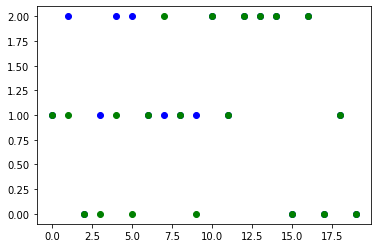

In [ ]:
plt.plot(y_test[0:20], "bo")
plt.plot(y_predAC[0:20], "go")
plt.show()

In [ ]:
#Matriz de confusión
matriz = confusion_matrix(y_test, y_predAC)
print(matriz)

[[ 8  0  0]
 [ 2 12  1]
 [ 1  4  8]]


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_predAC, average="macro")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_predAC)
print(exactitud)
from sklearn.metrics import recall_score ##sensibilidad
sensibilidad = recall_score(y_test, y_predAC, average="macro")
print(sensibilidad)
from sklearn.metrics import f1_score ##puntaje F1
puntajef1 = f1_score(y_test, y_predAC, average="macro")
print(puntajef1)
from sklearn.metrics import roc_auc_score ##roc_auc
y_pred_ra = modeloAC.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_ra, multi_class="ovr")
print(roc_auc)

0.7887205387205386
0.7777777777777778
0.8051282051282053
0.7811905129392397
0.8457145511493338


In [ ]:
y_pred_ra = modeloAC.predict_proba(x_test)
y_pred_ra

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
y_predAC

array([1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1])

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(modeloAC, x_test, y_test)  
plt.show()  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored